<a href="https://colab.research.google.com/github/Hayate336/Text-Image_Steganography/blob/main/Text_Image_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Berserk.jpg to Berserk.jpg


In [ ]:
def genData(data):
  newd = []
  for i in data:
    newd.append(format(ord(i), '08b'))

  print("ASCII Text to Binary :", newd)
  print(' ')
  return newd

In [ ]:
def modPix(pix, data, Mode):
  datalist = genData(data)
  lendata = len(datalist)
  imdata = iter(pix)
  print("Total Pixel Set Required :",lendata*3)
  print(' ')
  OP = 0

  for i in range(lendata):
    L2 = []
    if (Mode == '1' or Mode == 'L'):
      for k in range (OP,1000):
        L2.append(next(imdata))
        OP = OP+1
        if OP%9==0 and OP != 0:
          break
      pix = L2

    else:
      pix = [value for value in imdata.__next__()[:3] + imdata.__next__()[:3] + imdata.__next__()[:3]]

    print(f'Original Value Of Pixel Set {i+1} :  {pix}')
    for j in range(0, 8):
      if (datalist[i][j] == '0' and pix[j]% 2 != 0):
        pix[j] -= 1

      elif (datalist[i][j] == '1' and pix[j] % 2 == 0):
        pix[j] += 1

    if (i == lendata - 1):
      if (pix[-1] % 2 == 0):
        pix[-1] += 1

    else:
      if (pix[-1] % 2 != 0):
        pix[-1] -= 1

    pix = tuple(pix)
    print(f'Encoding Of Pixel Set {i+1} :  {pix}')
    print(' ')
    yield pix[0:3]
    yield pix[3:6]
    yield pix[6:9]

In [ ]:
def encode_enc(newimg, data):
  w = newimg.size[0]
  (x, y) = (0, 0)
  M = newimg.mode
  print(' ')
  print(' ')
  print('Width Of Orginal Image :',w)
  print(' ')
  print('Pixels Of Image :',list(newimg.getdata())[:20])
  print(' ')

  for pixel in modPix(newimg.getdata(), data, M):
    newimg.putpixel((x, y), pixel)
    if (x == w - 1):
      x = 0
      y += 1

    else:
      x += 1

In [ ]:
img = input("Image Name ( With Extension ) : ")
image = Image.open(img, 'r')

data = input("Enter Encoded Data : ")
if (len(data) == 0):
	raise ValueError('Empty Field')

newimg = image.copy()
encode_enc(newimg, data)

new_img_name = input("Output Image Name ( With Extension ) : ")
newimg.save(new_img_name, str(new_img_name.split(".")[1].upper()))

Image Name ( With Extension ) : Berserk.jpg
Enter Encoded Data : Hayate Ito
 
 
Width Of Orginal Image : 1600
 
Pixels Of Image : [(20, 20, 20), (18, 18, 18), (17, 17, 17), (17, 17, 17), (19, 19, 19), (20, 20, 20), (20, 20, 20), (19, 19, 19), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (18, 18, 18), (17, 17, 17)]
 
ASCII Text to Binary : ['01001000', '01100001', '01111001', '01100001', '01110100', '01100101', '00100000', '01001001', '01110100', '01101111']
 
Total Pixel Set Required : 30
 
Original Value Of Pixel Set 1 :  [20, 20, 20, 18, 18, 18, 17, 17, 17]
Encoding Of Pixel Set 1 :  (20, 21, 20, 18, 19, 18, 16, 16, 16)
 
Original Value Of Pixel Set 2 :  [17, 17, 17, 19, 19, 19, 20, 20, 20]
Encoding Of Pixel Set 2 :  (16, 17, 17, 18, 18, 18, 20, 21, 20)
 
Original Value Of Pixel Set 3 :  [20, 20, 20, 19, 19, 19, 18, 18, 18]
Encoding Of Pixel Set 3 :  (20, 21, 21, 19, 19, 18, 18, 19, 18)
 
O

In [ ]:
img = input("Image Name ( With Extension ) : ")
print(' ')
print(' ')
image = Image.open(img, 'r')

data = ''
imgdata = iter(image.getdata())
P = 0

while(True):
  L1 = []
  if (image.mode == '1' or image.mode == 'L'):
    for k in range (P,1000):
      L1.append(next(imgdata))
      P = P+1
      if P%9==0 and P != 0:
        break
    pixels = L1

  else:
    pixels = [value for value in imgdata.__next__()[:3] + imgdata.__next__()[:3] + imgdata.__next__()[:3]]

  print('Output Image Pixels :', pixels)
  binstr = ''
  j = 1

  for i in pixels[:8]:
    if (i % 2 == 0):
      binstr += '0'
    else:
      binstr += '1'

  print(f'Decoding Of Pixel Set {j} :  {binstr}')
  data += chr(int(binstr, 2))
  print('Binary To ASCII :', data)
  print(' ')
  print(' ')
  j = j+1
  if (pixels[-1] % 2 != 0):
    print("Decoded Data : ",data)
    break

Image Name ( With Extension ) : Guts.png
 
 
Output Image Pixels : [20, 21, 20, 18, 19, 18, 16, 16, 16]
Decoding Of Pixel Set 1 :  01001000
Binary To ASCII : H
 
 
Output Image Pixels : [16, 17, 17, 18, 18, 18, 20, 21, 20]
Decoding Of Pixel Set 1 :  01100001
Binary To ASCII : Ha
 
 
Output Image Pixels : [20, 21, 21, 19, 19, 18, 18, 19, 18]
Decoding Of Pixel Set 1 :  01111001
Binary To ASCII : Hay
 
 
Output Image Pixels : [18, 19, 19, 18, 18, 18, 18, 19, 18]
Decoding Of Pixel Set 1 :  01100001
Binary To ASCII : Haya
 
 
Output Image Pixels : [18, 19, 19, 19, 18, 19, 18, 18, 18]
Decoding Of Pixel Set 1 :  01110100
Binary To ASCII : Hayat
 
 
Output Image Pixels : [18, 19, 19, 18, 18, 19, 18, 19, 18]
Decoding Of Pixel Set 1 :  01100101
Binary To ASCII : Hayate
 
 
Output Image Pixels : [18, 18, 19, 16, 16, 16, 16, 16, 16]
Decoding Of Pixel Set 1 :  00100000
Binary To ASCII : Hayate 
 
 
Output Image Pixels : [16, 17, 16, 16, 17, 16, 16, 17, 16]
Decoding Of Pixel Set 1 :  01001001
Binary

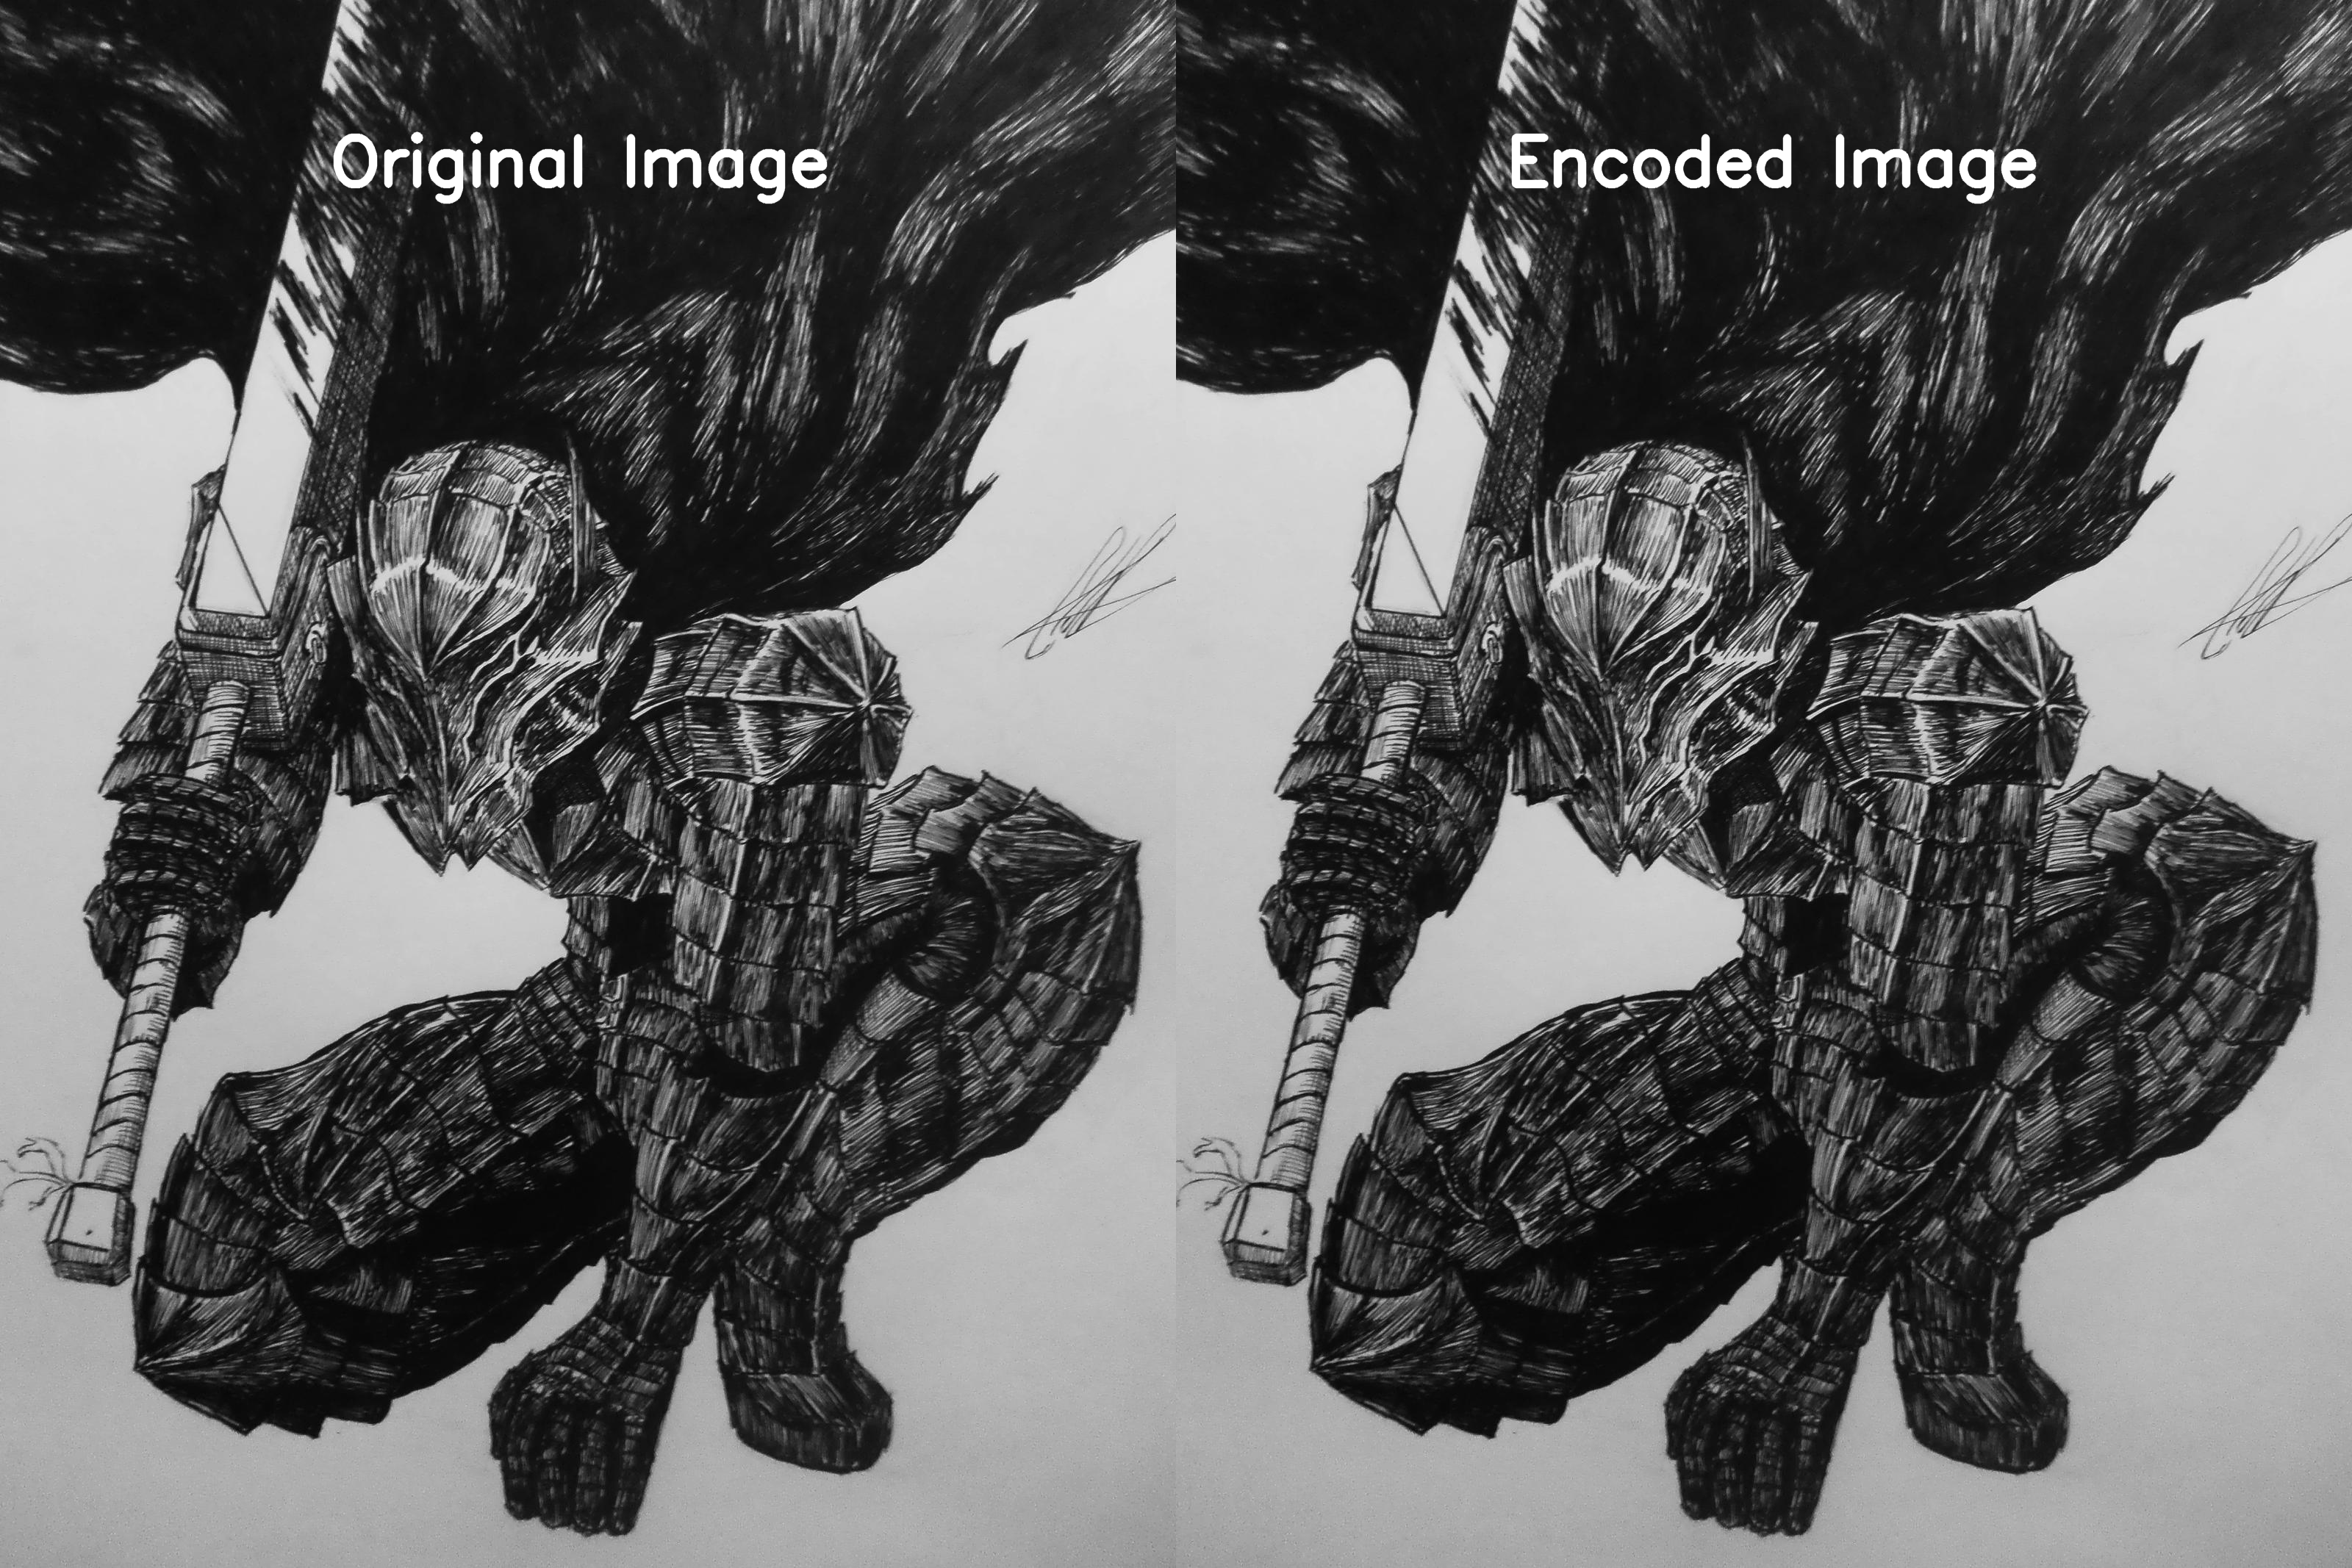

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
font_size = 3
font_thickness = 9
x,y = 450,250

image = cv2.imread('Berserk.jpg')
newimg = cv2.imread('Guts.png')

im1 = cv2.putText(image, 'Original Image', (x,y), font, font_size, (255,255,255), font_thickness, cv2.LINE_AA)
im2 = cv2.putText(newimg, 'Encoded Image', (x,y), font, font_size, (255,255,255), font_thickness, cv2.LINE_AA)

H2 = np.concatenate((im1, im2), axis=1)
cv2_imshow(H2)